In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec
import xarray as xr
import numpy as np
import os

In [2]:
USER = os.environ['USER']
datadir = f'/glade/scratch/{USER}/DPLE-results'

In [17]:
var = 'Phi'
#layer = '0-200m'
layer = '200-600m'

## plot

In [4]:
import matplotlib as mpl
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [5]:
new_cmapt = truncate_colormap('RdBu_r', 0.375, 1.0)
new_cmaps = truncate_colormap('PRGn_r', 0.375, 1.0)

In [6]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#csfont = {'fontname':'Times New Roman'}
#
boxna = ['01-EBS','02-GoA','03-CC','04-GoC','05-GoM','06-SEUS','07-NEUS','08-SS','09-LN','10-IPH','11-AI']
boxnb = [1,2,3,4,5,6,7,8,9,10,65]

1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
65 10


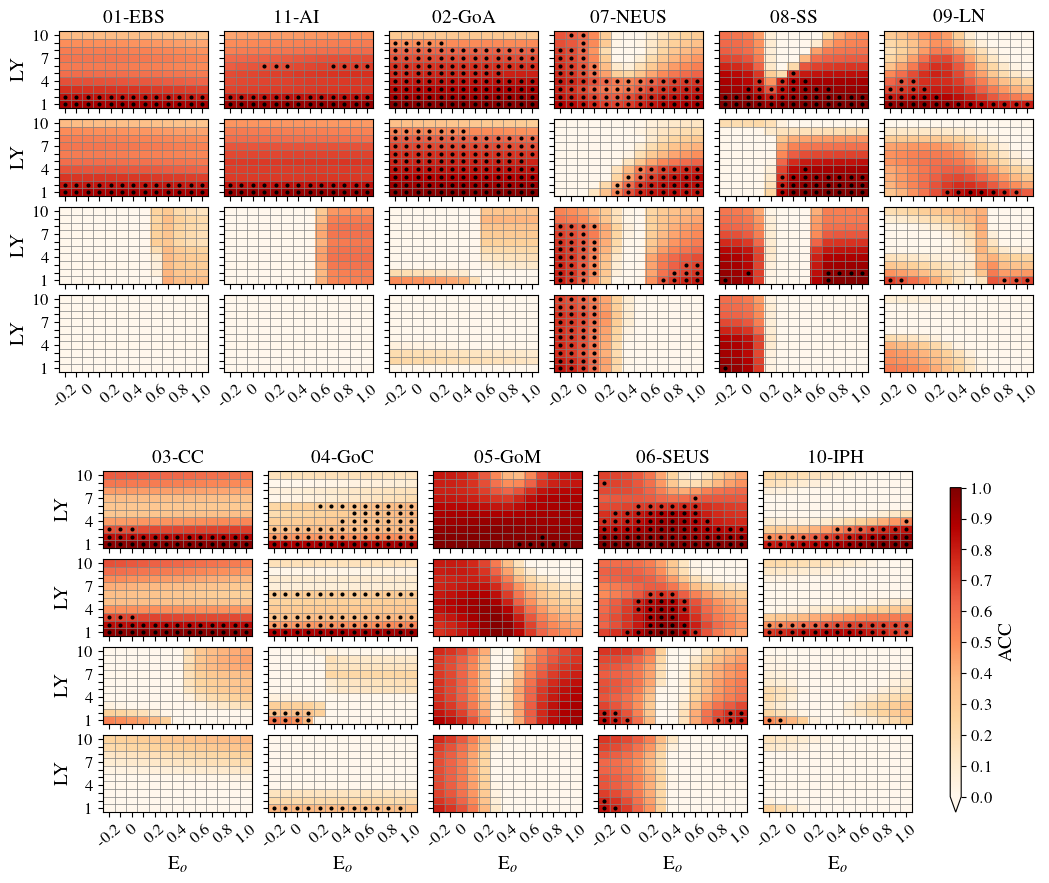

In [18]:
fig = plt.figure(figsize=[11, 11])
gs = gridspec.GridSpec(1, 3)
#
xx = np.arange(0.5,13,1);yy = np.arange(0.5,10,1)
xx, yy = np.meshgrid(xx, yy)
##
newbox = list(zip(boxnb, range(len(boxnb))))
boxloc = np.ones([len(boxnb),2])
boxloc[0,0],boxloc[10,0],boxloc[1,0],boxloc[6,0],boxloc[7,0],boxloc[8,0] = np.arange(0.06,0.96,0.15)
boxloc[0,1],boxloc[10,1],boxloc[1,1],boxloc[6,1],boxloc[7,1],boxloc[8,1] = 0.5*np.ones(6)
boxloc[2,0],boxloc[3,0],boxloc[4,0],boxloc[5,0],boxloc[9,0] = np.arange(0.10,0.85,0.15)
boxloc[2,1],boxloc[3,1],boxloc[4,1],boxloc[5,1],boxloc[9,1] = 0.10*np.ones(5)
#
for box, ii in newbox:
    print(box,ii)
    for tt,varr in [[3,'Phi'],[2,'O2'],[1,'TEMP'],[0,'SALT']]:
        if tt < 3:
            filename = f'{datadir}/DPLE_LME_box01-11_ACC_NMAE_{var}_components_{varr}_Eo_space_{layer}_leadyear_1-10.nc'
        else:
            filename = f'{datadir}/DPLE_LME_box01-11_ACC_NMAE_{var}_Eo_space_{layer}_leadyear_1-10.nc'
        ds = xr.open_dataset(filename)
        corr_d = ds['corr_d'].values
        rcri_d = ds['rcri_d'].values
        #
        dmask = corr_d > rcri_d
        #
        ax = fig.add_axes([boxloc[ii][0],boxloc[ii][1]+0.08*tt,0.135,0.07])
        cd1 = ax.pcolor(xx.T,yy.T,corr_d[:,ii], cmap=cm.OrRd, vmin = 0.,vmax = 1.)
        #
        xx1 = np.ma.array(xx.T, mask=~dmask[:,ii])
        yy1 = np.ma.array(yy.T, mask=~dmask[:,ii])
        ax.scatter(xx1[:,:], yy1[:,:], s=15, marker='.', color='k')
        #
        for kk in range(1,13):
            ax.plot([kk,kk],[0,10],lw=0.5,color='gray')
        for kk in range(1,10):
            ax.plot([0,13],[kk,kk],lw=0.5,color='gray')
        #
        ax.set_yticks(np.arange(0.5, 10, 1))
        ax.set_xticks(np.arange(0.5, 13, 1))
        if tt == 0:
            ax.set_xticklabels(['-0.2','','0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=12,rotation=40)
        else:
            ax.set_xticklabels('')
        ###
        if tt == 3:
            ax.set_title(boxna[ii], fontsize=14, fontweight='bold')
        if box in [1,3]:
            ax.set_ylabel('LY', fontsize=14, fontweight='bold')
            ax.set_yticklabels(['1','','','4','','','7','','','10'],fontsize=12)
        else:
            ax.set_yticklabels('')
        if box in [3,4,5,6,10] and tt == 0:
            ax.set_xlabel("E$_o$", fontsize=14, fontweight='bold')
        ax.set_xlim(0, 13)
        ax.set_ylim(0, 10)
        
cbaxes = fig.add_axes([0.87, 0.10, 0.01, 0.295])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cb.ax.tick_params(labelsize=12)
cb.set_label(label='ACC', fontsize=14, fontweight='bold')
#
#cbaxes = fig.add_axes([0.89, 0.10, 0.01, 0.295])
#cb = plt.colorbar(cd2, orientation="vertical", cax=cbaxes, extend='both', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
#cb.ax.tick_params(labelsize=12)
#cb.set_label(label='$\Delta$ACC', fontsize=14, fontweight='bold')
#
output = f'/glade/scratch/{USER}/DPLE-plots'
#outfile = f'{output}/LME_box01-11_FOSI_hindcast_{var_name}_vertical_distribution_mean_and_std_1948-2017.png'
outfile = f'{output}/LME_box01-11_DPLE_ACC_{var}_and_{var}_components_Eo_space_{layer}_leadyear1-10.png'
plt.savefig(outfile, dpi=400, transparent=True)
plt.show()